In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [3]:
T2015 = pd.read_csv('NHIS_OPEN_T20_2015.csv',encoding='CP949')
T2015.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2015,970070,1,1,6,29,20151218,2,4,K358,NaN,5,9,0,1621240,315300,1305940,0,20161220
1,2015,372596,2,1,8,41,20151207,2,4,K358,NaN,6,13,0,2545350,542350,2003000,0,20161220
2,2015,363860,3,2,9,41,20151204,2,4,K358,NaN,4,11,0,2344790,451710,1893080,0,20161220
3,2015,192334,4,2,6,47,20151222,2,10,O342,O601,7,14,0,2314100,486630,1827470,0,20161220
4,2015,960084,5,1,1,47,20151216,2,13,J353,H659,4,9,0,1121030,127490,993540,0,20161220


In [4]:
T2015.shape

(11231930, 19)

In [5]:
T2014 = pd.read_csv('NHIS_OPEN_T20_2014.csv',encoding='CP949')
T2014.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2014,618240,1,2,7,11,20141227,3,12,B309,NaN,1,1,15,19750,5400,14350,1,20161220
1,2014,561154,2,2,14,11,20141211,3,12,H258,H408,1,1,15,12510,1500,11010,1,20161220
2,2014,38630,3,2,16,11,20141218,3,12,H258,H011,1,1,15,12510,1500,11010,1,20161220
3,2014,759014,4,2,17,41,20141202,3,12,H258,H041,1,1,15,14280,1500,12780,1,20161220
4,2014,281768,5,1,9,11,20141202,3,12,H041,H108,1,1,15,16380,4900,11480,1,20161220


In [6]:
T2014.shape

(11373997, 19)

In [7]:
T2013 = pd.read_csv('NHIS_OPEN_T20_2013.csv',encoding='CP949')
T2013.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2013,287350,1,2,9,11,20131212,3,14,L033,R195,1,1,15,13190,3900,9290,4,20151220
1,2013,96615,2,1,11,11,20131227,3,14,L259,NaN,1,1,15,13190,3900,9290,4,20151220
2,2013,96615,3,1,11,11,20131231,3,14,L259,NaN,1,1,15,9430,2800,6630,4,20151220
3,2013,295197,4,2,4,11,20131227,3,14,L259,NaN,1,1,15,13190,3900,9290,1,20151220
4,2013,586622,5,1,16,11,20131210,3,14,N408,NaN,1,1,15,9430,1500,7930,30,20151220


In [8]:
T2013.shape

(11290037, 19)

## drop duplicate merge data 

In [9]:
t2015=T2015[['가입자 일련번호','성별코드','연령대코드','진료과목코드','주상병코드']]
t2015=t2015.drop_duplicates()
t2015['주상병코드2']=t2015['주상병코드'].str[0:2]
t2015mer=t2015.loc[:,['성별코드','연령대코드','진료과목코드','주상병코드2']]
t2015mer=t2015mer.rename(columns={'성별코드':'sex','연령대코드':'age','진료과목코드':'treat_kind','주상병코드2':'main_sick_s'})
t2015mer.head()

,sex,age,treat_kind,main_sick_s
0,1,6,4,K3
1,1,8,4,K3
2,2,9,4,K3
3,2,6,10,O3
4,1,1,13,J3


In [10]:
t2014=T2014[['가입자 일련번호','성별코드','연령대코드','진료과목코드','주상병코드','시도코드']]
t2014=t2014.drop_duplicates()
t2014['주상병코드2']=t2014['주상병코드'].str[0:2]
t2014mer=t2014.loc[:,['성별코드','연령대코드','진료과목코드','주상병코드2','시도코드']]
t2014mer=t2014mer.rename(columns={'성별코드':'sex','연령대코드':'age','진료과목코드':'treat_kind','주상병코드2':'main_sick_s'})
t2014mer.head()

,sex,age,treat_kind,main_sick_s,시도코드
0,2,7,12,B3,11
1,2,14,12,H2,11
2,2,16,12,H2,11
3,2,17,12,H2,41
4,1,9,12,H0,11


In [11]:
t2013=T2013[['가입자 일련번호','성별코드','연령대코드','진료과목코드','주상병코드']]
t2013=t2013.drop_duplicates()
t2013['주상병코드2']=t2013['주상병코드'].str[0:2]
t2013mer=t2013.loc[:,['성별코드','연령대코드','진료과목코드','주상병코드2']]
t2013mer=t2013mer.rename(columns={'성별코드':'sex','연령대코드':'age','진료과목코드':'treat_kind','주상병코드2':'main_sick_s'})
t2013mer.head()

,sex,age,treat_kind,main_sick_s
0,2,9,14,L0
1,1,11,14,L2
3,2,4,14,L2
4,1,16,14,N4
5,1,13,15,N4


In [12]:
JR_2010_2015=pd.concat([t2013mer,t2014mer,t2015mer])
JR_2010_2015.head()

,age,main_sick_s,sex,treat_kind,시도코드
0,9,L0,2,14,NaN
1,11,L2,1,14,NaN
3,4,L2,2,14,NaN
4,16,N4,1,14,NaN
5,13,N4,1,15,NaN


In [13]:
JR_2010_2015.shape

(15094095, 5)

## Treat kind 1 내과

In [14]:
#1내과,5정형외과,11소아청소년과,12안과,13이비인후과
one=JR_2010_2015[JR_2010_2015['treat_kind']==1]
one.head()

,age,main_sick_s,sex,treat_kind,시도코드
33,12,J0,2,1,NaN
40,7,J4,2,1,NaN
41,7,J3,2,1,NaN
42,7,J4,2,1,NaN
70,12,J4,1,1,NaN


In [15]:
import seaborn as sns

In [16]:
one_w=one[one['sex']==2]
one_m=one[one['sex']==1]
one_w_t=one_w[['age','treat_kind']]
one_m_t=one_m[['age','treat_kind']]
one_w_t=pd.crosstab(one_w_t.age, one_w_t.treat_kind)
one_m_t=pd.crosstab(one_m_t.age, one_m_t.treat_kind)
one_m_t=one_m_t.rename(columns={1:'man'})
one_w_t=one_w_t.rename(columns={1:'woman'})
one_wm=pd.merge(one_w_t, one_m_t, left_index=True, right_index=True)
one_wm.columns.name='sex'
one_wm=one_wm.reset_index()

### main sick by woman age 12,11

In [17]:
# woman age 12 main sick 3개
one_w_m=one_w[['age','main_sick_s']]
one_m_m=one_m[['age','main_sick_s']]
main1w=one_w_m[one_w_m['age']==12].groupby('main_sick_s').count()
main1w=main1w.sort_values('age',ascending=False)
main1_1=main1w[:3]
main1_1=main1_1.reset_index()
main1_1['ratio']=main1_1['age']/263972
# woman age 11 main sick 3
main1w2=one_w_m[one_w_m['age']==11].groupby('main_sick_s').count()
main1w2=main1w2.sort_values('age',ascending=False)
main1_2=main1w2[:3]
main1_2=main1_2.reset_index()
main1_2['ratio']=main1_2.loc[:,['age']]/251554

### main sick by man age 12,11

In [18]:
# man age 12 main sick 3개
main1m=one_m_m[one_m_m['age']==12].groupby('main_sick_s').count()
main1m=main1m.sort_values('age',ascending=False)
main1_3=main1m[:3]
main1_3=main1_3.reset_index()
main1_3['ratio']=main1_3['age']/200734
# woman age 11 main sick 3
main1m2=one_m_m[one_m_m['age']==11].groupby('main_sick_s').count()
main1m2=main1m2.sort_values('age',ascending=False)
main1_4=main1m2[:3]
main1_4=main1_4.reset_index()
main1_4['ratio']=main1_4.loc[:,['age']]/191937
#K2=식도,위 및 십이지장의 질환/oesophagus,stomach and duodenum
#I1=고혈압성질환/hypertensive 
#J0=급성상기도감염/acute upper respiratory infections
#J2=기타 급성하기도감염/other acute lower respiratory infections

### pie chart

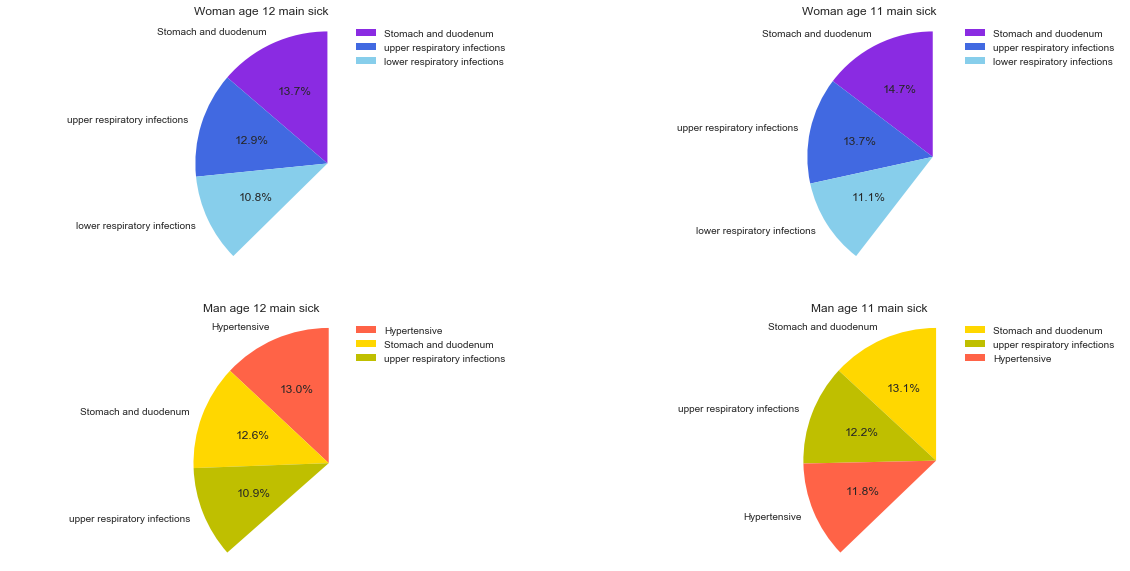

In [19]:
main12=main1_1.set_index(main1_1['main_sick_s'], inplace=False)
del main12['main_sick_s']
main12=main12.rename(index={'K2':'Stomach and duodenum','J0':'upper respiratory infections',
                            'J2':'lower respiratory infections'})
main11=main1_2.set_index(main1_2['main_sick_s'], inplace=False)
del main11['main_sick_s']
main11=main11.rename(index={'K2':'Stomach and duodenum','J0':'upper respiratory infections',
                            'J2':'lower respiratory infections'})
main12m=main1_3.set_index(main1_3['main_sick_s'], inplace=False)
del main12m['main_sick_s']
main12m=main12m.rename(index={'K2':'Stomach and duodenum','J0':'upper respiratory infections',
                              'I1':'Hypertensive'})
main11m=main1_4.set_index(main1_4['main_sick_s'], inplace=False)
del main11m['main_sick_s']
main11m=main11m.rename(index={'K2':'Stomach and duodenum','J0':'upper respiratory infections',
                              'I1':'Hypertensive'})
explode=(0,0,0)
colors=['blueviolet','royalblue','skyblue']
colorss=['tomato','gold','y']
colorsss=['gold','y','tomato']
# plot pie chart
fig=plt.figure(figsize=((20,10)))
ax1=plt.subplot2grid((2,2),(0,0))
plt.pie(main12['ratio'], labels=main12.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Woman age 12 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(0,1))
plt.pie(main11['ratio'], labels=main11.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Woman age 11 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(1,0))
plt.pie(main12m['ratio'], labels=main12m.index, colors=colorss, autopct='%1.1f%%', startangle=90)
plt.title('Man age 12 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(1,1))
plt.pie(main11m['ratio'], labels=main11m.index,colors=colorsss, autopct='%1.1f%%', startangle=90)
plt.title('Man age 11 main sick')
plt.axis('equal')
plt.legend()
plt.savefig('treat_kind_1.png',dpi=1000)

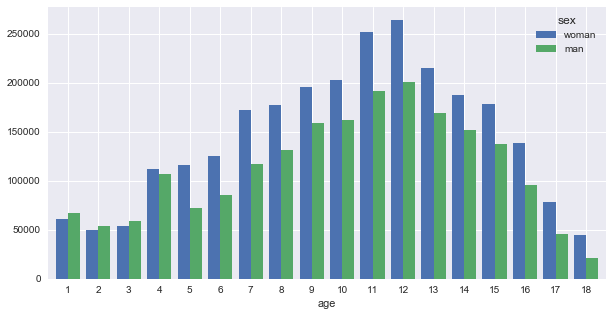

In [20]:
one_wm.plot.bar(x='age',y=['woman','man'],rot=0,width=0.8,figsize=((10,5)))
plt.savefig('내과가는환자나이.png',dpi=1000)
#figure, ax=plt.subplots(nrows=1, ncols=1)
#figure.set_size_inches(10,5)
#sns.countplot(data=one, x='age', hue='sex', ax=ax)

## Treat kind 5 정형외과

In [21]:
five=JR_2010_2015[JR_2010_2015['treat_kind']==5]
five.head()

,age,main_sick_s,sex,treat_kind,시도코드
101,7,S0,1,5,NaN
188,6,S0,2,5,NaN
199,16,M1,2,5,NaN
202,16,M7,2,5,NaN
283,6,S6,1,5,NaN


In [22]:
f_w=five[five['sex']==2]
f_m=five[five['sex']==1]
f_w_t=f_w[['age','treat_kind']]
f_m_t=f_m[['age','treat_kind']]
f_w_t=pd.crosstab(f_w_t.age, f_w_t.treat_kind)
f_m_t=pd.crosstab(f_m_t.age, f_m_t.treat_kind)
f_m_t=f_m_t.rename(columns={5:'man'})
f_w_t=f_w_t.rename(columns={5:'woman'})
f_wm=pd.merge(f_w_t, f_m_t, left_index=True, right_index=True)
f_wm.columns.name='sex'
f_wm=f_wm.reset_index()

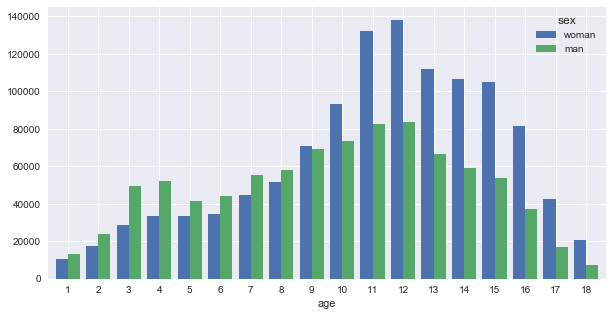

In [23]:
f_wm.plot.bar(x='age',y=['woman','man'],rot=0,width=0.8,figsize=((10,5)))
plt.savefig('정형외과가는환자나이.png',dpi=1000)

### main sick by woman age 12,11

In [24]:
# woman age 12 main sick 3개
f_w_m=f_w[['age','main_sick_s']]
f_m_m=f_m[['age','main_sick_s']]
main5w=f_w_m[f_w_m['age']==12].groupby('main_sick_s').count()
main5w=main5w.sort_values('age',ascending=False)
main5_1=main5w[:3]
main5_1=main5_1.reset_index()
main5_1['ratio']=main5_1['age']/138060
# woman age 11 main sick 3
main5w2=f_w_m[f_w_m['age']==11].groupby('main_sick_s').count()
main5w2=main5w2.sort_values('age',ascending=False)
main5_2=main5w2[:3]
main5_2=main5_2.reset_index()
main5_2['ratio']=main5_2.loc[:,['age']]/132292
main5_1

,main_sick_s,age,ratio
0,M1,24758,0.179328
1,M7,23791,0.172324
2,M5,23207,0.168094


### main sick by man age 12,11

In [25]:
# man age 12 main sick 3개
main5m=f_m_m[f_m_m['age']==12].groupby('main_sick_s').count()
main5m=main5m.sort_values('age',ascending=False)
main5_3=main5m[:3]
main5_3=main5_3.reset_index()
main5_3['ratio']=main5_3['age']/83626
# woman age 11 main sick 3
main5m2=f_m_m[f_m_m['age']==11].groupby('main_sick_s').count()
main5m2=main5m2.sort_values('age',ascending=False)
main5_4=main5m2[:3]
main5_4=main5_4.reset_index()
main5_4['ratio']=main5_4.loc[:,['age']]/82449
main5_3
#M7=연조직장애/other soft tissue disorders
#M5=등병증/other dorsopathies
#M1=관절증/arthropathies

,main_sick_s,age,ratio
0,M7,16147,0.193086
1,M5,13378,0.159974
2,M1,11568,0.138330


### pie chart

In [26]:
main512=main5_1.set_index(main5_1['main_sick_s'], inplace=False)
del main512['main_sick_s']
main512=main512.rename(index={'M1':'Arthropathies','M5':'Dorsopathies',
                              'M7':'Soft tissue disorders'})
main511=main5_2.set_index(main5_2['main_sick_s'], inplace=False)
del main511['main_sick_s']
main511=main511.rename(index={'M1':'Arthropathies','M5':'Dorsopathies',
                              'M7':'Soft tissue disorders'})
main512m=main5_3.set_index(main5_3['main_sick_s'], inplace=False)
del main512m['main_sick_s']
main512m=main512m.rename(index={'M1':'Arthropathies','M5':'Dorsopathies',
                              'M7':'Soft tissue disorders'})
main511m=main5_4.set_index(main5_4['main_sick_s'], inplace=False)
del main511m['main_sick_s']
main511m=main511m.rename(index={'M1':'Arthropathies','M5':'Dorsopathies',
                              'M7':'Soft tissue disorders'})
main512m

,age,ratio
main_sick_s,,
Soft tissue disorders,16147,0.193086
Dorsopathies,13378,0.159974
Arthropathies,11568,0.138330


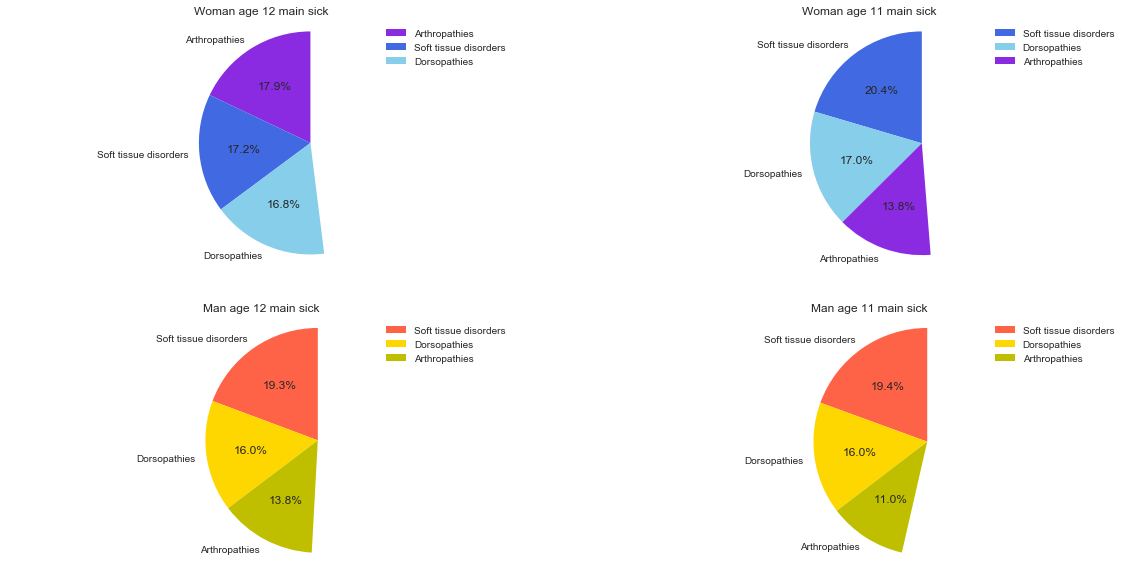

In [27]:
explode=(0,0,0)
colors=['blueviolet','royalblue','skyblue']
colorss=['tomato','gold','y']
colorsss=['royalblue','skyblue','blueviolet']
# plot pie chart
fig=plt.figure(figsize=((20,10)))
ax1=plt.subplot2grid((2,2),(0,0))
plt.pie(main512['ratio'], labels=main512.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Woman age 12 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(0,1))
plt.pie(main511['ratio'], labels=main511.index, colors=colorsss, autopct='%1.1f%%', startangle=90)
plt.title('Woman age 11 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(1,0))
plt.pie(main512m['ratio'], labels=main512m.index, colors=colorss, autopct='%1.1f%%', startangle=90)
plt.title('Man age 12 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(1,1))
plt.pie(main511m['ratio'], labels=main511m.index,colors=colorss, autopct='%1.1f%%', startangle=90)
plt.title('Man age 11 main sick')
plt.axis('equal')
plt.legend()
plt.savefig('정형외과.png',dpi=1000)

## Treat kind 11 소아청소년과

In [28]:
ele=JR_2010_2015[JR_2010_2015['treat_kind']==11]
ele.head()

,age,main_sick_s,sex,treat_kind,시도코드
39,2,B3,2,11,NaN
149,2,J0,1,11,NaN
182,3,J0,1,11,NaN
185,3,J2,1,11,NaN
191,3,J0,1,11,NaN


In [29]:
e_w=ele[ele['sex']==2]
e_m=ele[ele['sex']==1]
e_w_t=e_w[['age','treat_kind']]
e_m_t=e_m[['age','treat_kind']]
e_w_t=pd.crosstab(e_w_t.age, e_w_t.treat_kind)
e_m_t=pd.crosstab(e_m_t.age, e_m_t.treat_kind)
e_m_t=e_m_t.rename(columns={11:'man'})
e_w_t=e_w_t.rename(columns={11:'woman'})
e_wm=pd.merge(e_w_t, e_m_t, left_index=True, right_index=True)
e_wm.columns.name='sex'
e_wm=e_wm.reset_index()

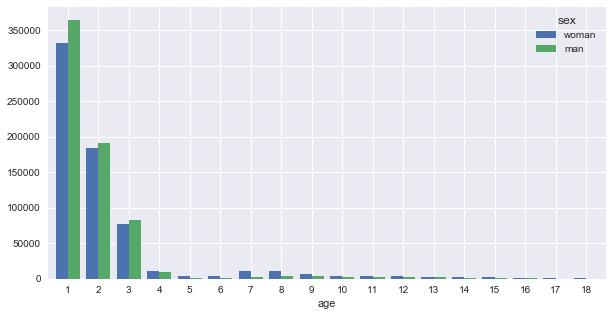

In [30]:
e_wm.plot.bar(x='age',y=['woman','man'],rot=0,width=0.8,figsize=((10,5)))
plt.savefig('소아과가는환자나이.png',dpi=1000)

### main sick by woman age 1,2

In [31]:
# woman age 12 main sick 3개
e_w_m=e_w[['age','main_sick_s']]
e_m_m=e_m[['age','main_sick_s']]
main11w=e_w_m[e_w_m['age']==1].groupby('main_sick_s').count()
main11w=main11w.sort_values('age',ascending=False)
main11_1=main11w[:3]
main11_1=main11_1.reset_index()
main11_1['ratio']=main11_1['age']/331689
# woman age 11 main sick 3
main11w2=e_w_m[e_w_m['age']==2].groupby('main_sick_s').count()
main11w2=main11w2.sort_values('age',ascending=False)
main11_2=main11w2[:3]
main11_2=main11_2.reset_index()
main11_2['ratio']=main11_2.loc[:,['age']]/184697
main11_2

,main_sick_s,age,ratio
0,J0,57456,0.311082
1,J2,41277,0.223485
2,J3,21194,0.114750


### main sick by man age 1,2

In [32]:
# man age 12 main sick 3개
main11m=e_m_m[e_m_m['age']==1].groupby('main_sick_s').count()
main11m=main11m.sort_values('age',ascending=False)
main11_3=main11m[:3]
main11_3=main11_3.reset_index()
main11_3['ratio']=main11_3['age']/364529
# woman age 11 main sick 3
main11m2=e_m_m[e_m_m['age']==2].groupby('main_sick_s').count()
main11m2=main11m2.sort_values('age',ascending=False)
main11_4=main11m2[:3]
main11_4=main11_4.reset_index()
main11_4['ratio']=main11_4.loc[:,['age']]/191734
main11_4
#J0=급성상기도감염/upper respiratory infections
#J2=급성 하기도감염/lower respiratory infections
#J3=상기도 질환/upper respiratory tract

,main_sick_s,age,ratio
0,J0,58902,0.307207
1,J2,43108,0.224832
2,J3,24727,0.128965


### pie chart

In [33]:
main1112=main11_1.set_index(main11_1['main_sick_s'], inplace=False)
del main1112['main_sick_s']
main1112=main1112.rename(index={'J0':'Upper repiratory infections','J2':'Lower respiratory infections',
                              'J3':'Upper respiratory tract'})
main1111=main11_2.set_index(main11_2['main_sick_s'], inplace=False)
del main1111['main_sick_s']
main1111=main1111.rename(index={'J0':'Upper repiratory infections','J2':'Lower respiratory infections',
                              'J3':'Upper respiratory tract'})
main1112m=main11_3.set_index(main11_3['main_sick_s'], inplace=False)
del main1112m['main_sick_s']
main1112m=main1112m.rename(index={'J0':'Upper repiratory infections','J2':'Lower respiratory infections',
                              'J3':'Upper respiratory tract'})
main1111m=main11_4.set_index(main11_4['main_sick_s'], inplace=False)
del main1111m['main_sick_s']
main1111m=main1111m.rename(index={'J0':'Upper repiratory infections','J2':'Lower respiratory infections',
                              'J3':'Upper respiratory tract'})

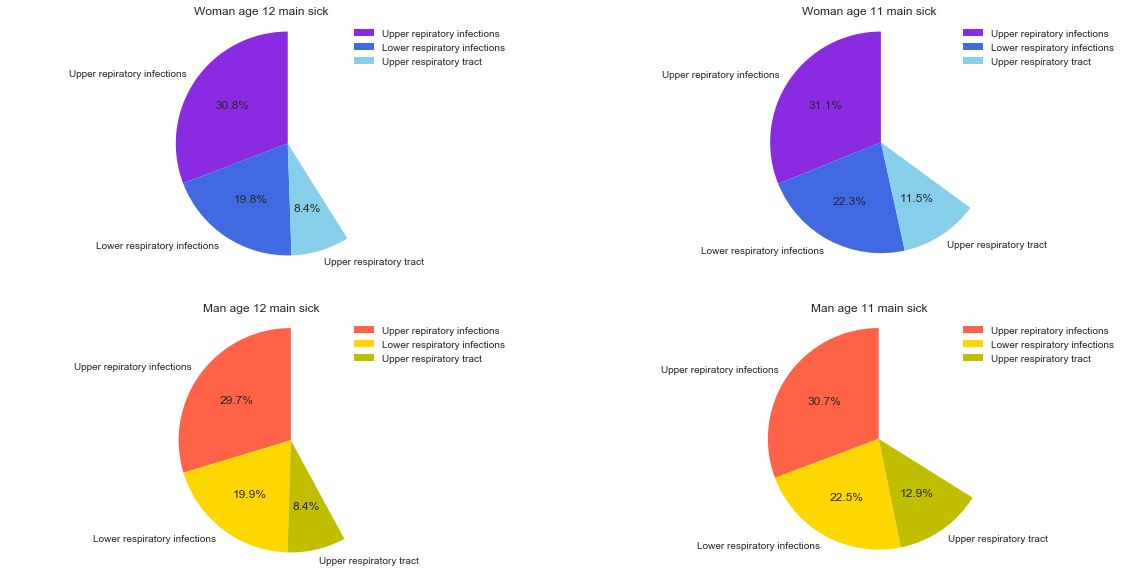

In [34]:
explode=(0,0,0)
colors=['blueviolet','royalblue','skyblue']
colorss=['tomato','gold','y']
colorsss=['royalblue','skyblue','blueviolet']
# plot pie chart
fig=plt.figure(figsize=((20,10)))
ax1=plt.subplot2grid((2,2),(0,0))
plt.pie(main1112['ratio'], labels=main1112.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Woman age 12 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(0,1))
plt.pie(main1111['ratio'], labels=main1111.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Woman age 11 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(1,0))
plt.pie(main1112m['ratio'], labels=main1112m.index, colors=colorss, autopct='%1.1f%%', startangle=90)
plt.title('Man age 12 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(1,1))
plt.pie(main1111m['ratio'], labels=main1111m.index,colors=colorss, autopct='%1.1f%%', startangle=90)
plt.title('Man age 11 main sick')
plt.axis('equal')
plt.legend()
plt.savefig('소아청소년과.png',dpi=1000)

## Treat kind 12 안과

In [35]:
twe=JR_2010_2015[JR_2010_2015['treat_kind']==12]

In [36]:
t_w=twe[twe['sex']==2]
t_m=twe[twe['sex']==1]
t_w_t=t_w[['age','treat_kind']]
t_m_t=t_m[['age','treat_kind']]
t_w_t=pd.crosstab(t_w_t.age, t_w_t.treat_kind)
t_m_t=pd.crosstab(t_m_t.age, t_m_t.treat_kind)
t_m_t=t_m_t.rename(columns={12:'man'})
t_w_t=t_w_t.rename(columns={12:'woman'})
t_wm=pd.merge(t_w_t, t_m_t, left_index=True, right_index=True)
t_wm.columns.name='sex'
t_wm=t_wm.reset_index()

In [37]:
#t_wm.plot.bar(x='age',y=['woman','man'],rot=0,width=0.8,figsize=((10,5)))
#plt.savefig('안과가는환자나이.png',dpi=1000)

### main sick by woman age 12,11

In [38]:
# woman age 12 main sick 3개
t_w_m=t_w[['age','main_sick_s']]
t_m_m=t_m[['age','main_sick_s']]
main12w=t_w_m[t_w_m['age']==12].groupby('main_sick_s').count()
main12w=main12w.sort_values('age',ascending=False)
main12_1=main12w[:3]
main12_1=main12_1.reset_index()
main12_1['ratio']=main12_1['age']/54650
# woman age 11 main sick 3
main12w2=t_w_m[t_w_m['age']==11].groupby('main_sick_s').count()
main12w2=main12w2.sort_values('age',ascending=False)
main12_2=main12w2[:3]
main12_2=main12_2.reset_index()
main12_2['ratio']=main12_2.loc[:,['age']]/50500
main12_1

,main_sick_s,age,ratio
0,H1,19312,0.353376
1,H0,13903,0.254401
2,H5,4320,0.079048


### main sick by man age 2,12

In [39]:
# man age 12 main sick 3개
main12m=t_m_m[t_m_m['age']==2].groupby('main_sick_s').count()
main12m=main12m.sort_values('age',ascending=False)
main12_3=main12m[:3]
main12_3=main12_3.reset_index()
main12_3['ratio']=main12_3['age']/38580
# woman age 11 main sick 3
main12m2=t_m_m[t_m_m['age']==12].groupby('main_sick_s').count()
main12m2=main12m2.sort_values('age',ascending=False)
main12_4=main12m2[:3]
main12_4=main12_4.reset_index()
main12_4['ratio']=main12_4.loc[:,['age']]/37764
main12_4
#H1=결막의 장애/disorders of conjunctiva
#H0=눈꺼풀 눈물계통 장애/disorders of eyelid, lacrimal system and orbit
#H3=망막 장애/disorders of choroid and retina
#H5=기타 눈 장애/other disorders of eye

,main_sick_s,age,ratio
0,H1,11818,0.312944
1,H0,7637,0.202230
2,H3,3544,0.093846


### pie chart

In [40]:
main1212=main12_1.set_index(main12_1['main_sick_s'], inplace=False)
del main1212['main_sick_s']
main1212=main1212.rename(index={'H1':'Disorders of conjunctiva','H0':'Disorders of eyelid & lacrimal system',
                              'H5':'Other disorders of eye'})
main1211=main12_2.set_index(main12_2['main_sick_s'], inplace=False)
del main1211['main_sick_s']
main1211=main1211.rename(index={'H1':'Disorders of conjunctiva','H0':'Disorders of eyelid & lacrimal system',
                              'H5':'Other disorders of eye'})
main1212m=main12_3.set_index(main12_3['main_sick_s'], inplace=False)
del main1212m['main_sick_s']
main1212m=main1212m.rename(index={'H1':'Disorders of conjunctiva','H0':'Disorders of eyelid & lacrimal system',
                              'H5':'Other disorders of eye'})
main1211m=main12_4.set_index(main12_4['main_sick_s'], inplace=False)
del main1211m['main_sick_s']
main1211m=main1211m.rename(index={'H1':'Disorders of conjunctiva','H0':'Disorders of eyelid & lacrimal system',
                              'H3':'Disorders of choroid and retina'})
main1212m

,age,ratio
main_sick_s,,
Other disorders of eye,13687,0.354769
Disorders of conjunctiva,13459,0.348860
Disorders of eyelid & lacrimal system,4826,0.125091


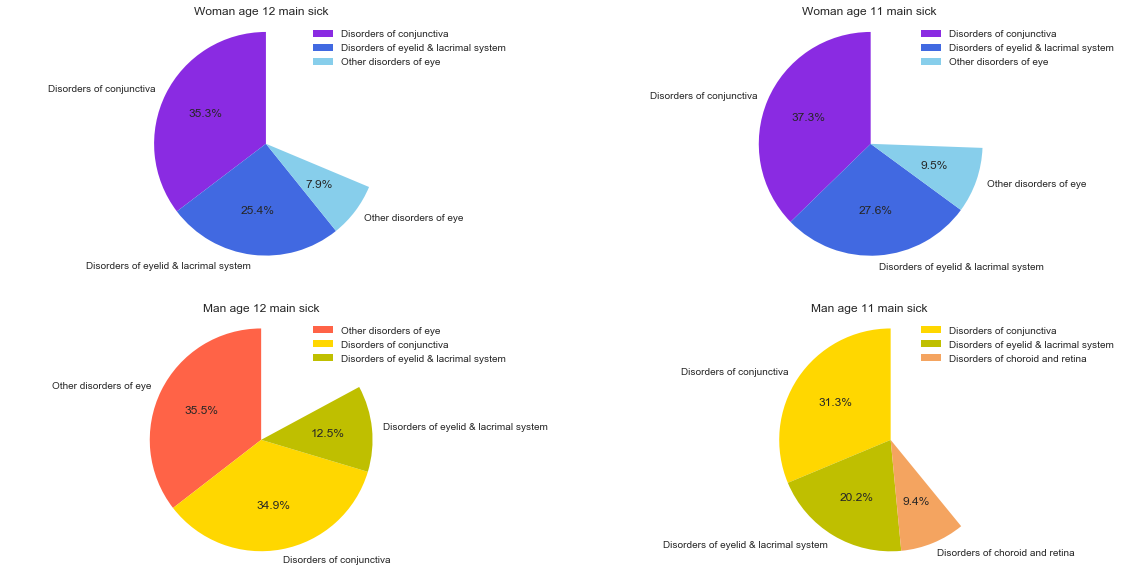

In [41]:
explode=(0,0,0)
colors=['blueviolet','royalblue','skyblue']
colorss=['tomato','gold','y']
colorsss=['gold','y','sandybrown']
# plot pie chart
fig=plt.figure(figsize=((20,10)))
ax1=plt.subplot2grid((2,2),(0,0))
plt.pie(main1212['ratio'], labels=main1212.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Woman age 12 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(0,1))
plt.pie(main1211['ratio'], labels=main1211.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Woman age 11 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(1,0))
plt.pie(main1212m['ratio'], labels=main1212m.index, colors=colorss, autopct='%1.1f%%', startangle=90)
plt.title('Man age 12 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(1,1))
plt.pie(main1211m['ratio'], labels=main1211m.index,colors=colorsss, autopct='%1.1f%%', startangle=90)
plt.title('Man age 11 main sick')
plt.axis('equal')
plt.legend()
plt.savefig('안과.png',dpi=1000)

## Treat kind 13 이비인후과

In [42]:
thir=JR_2010_2015[JR_2010_2015['treat_kind']==13]
thir.head()

,age,main_sick_s,sex,treat_kind,시도코드
6,3,J3,2,13,NaN
7,2,J0,2,13,NaN
8,2,J2,1,13,NaN
9,1,J2,2,13,NaN
11,16,J0,2,13,NaN


In [43]:
r_w=thir[thir['sex']==2]
r_m=thir[thir['sex']==1]
r_w_t=r_w[['age','treat_kind']]
r_m_t=r_m[['age','treat_kind']]
r_w_t=pd.crosstab(r_w_t.age, r_w_t.treat_kind)
r_m_t=pd.crosstab(r_m_t.age, r_m_t.treat_kind)
r_m_t=r_m_t.rename(columns={13:'man'})
r_w_t=r_w_t.rename(columns={13:'woman'})
r_wm=pd.merge(r_w_t, r_m_t, left_index=True, right_index=True)
r_wm.columns.name='sex'
r_wm=r_wm.reset_index()
r_wm

sex,age,woman,man
0,1,68719,76027
1,2,57388,65534
2,3,38229,44481
3,4,41144,42198
4,5,43226,27669
5,6,49147,30704
6,7,66659,41195
7,8,66985,44414
8,9,60613,43957
9,10,53169,37730


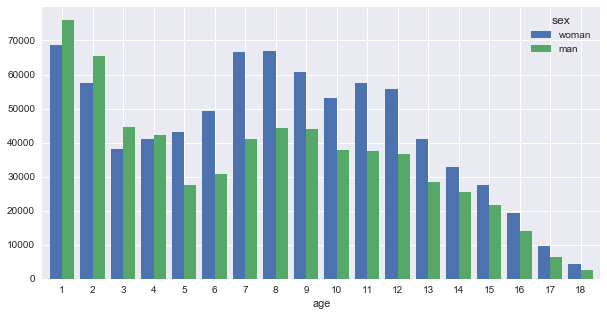

In [44]:
r_wm.plot.bar(x='age',y=['woman','man'],rot=0,width=0.8,figsize=((10,5)))
plt.savefig('이비인후과가는환자나이.png',dpi=1000)

### main sick of by woman age 1,8

In [45]:
# woman age 12 main sick 3개
r_w_m=r_w[['age','main_sick_s']]
r_m_m=r_m[['age','main_sick_s']]
main13w=r_w_m[r_w_m['age']==1].groupby('main_sick_s').count()
main13w=main13w.sort_values('age',ascending=False)
main13_1=main13w[:3]
main13_1=main13_1.reset_index()
main13_1['ratio']=main13_1['age']/68719
# woman age 11 main sick 3
main13w2=r_w_m[r_w_m['age']==8].groupby('main_sick_s').count()
main13w2=main13w2.sort_values('age',ascending=False)
main13_2=main13w2[:3]
main13_2=main13_2.reset_index()
main13_2['ratio']=main13_2.loc[:,['age']]/66985
main13_2

,main_sick_s,age,ratio
0,J0,25779,0.384847
1,J3,16504,0.246384
2,J2,9011,0.134523


### main sick by man age 1,2

In [46]:
# man age 12 main sick 3개
main13m=r_m_m[r_m_m['age']==1].groupby('main_sick_s').count()
main13m=main13m.sort_values('age',ascending=False)
main13_3=main13m[:3]
main13_3=main13_3.reset_index()
main13_3['ratio']=main13_3['age']/76027
# woman age 11 main sick 3
main13m2=r_m_m[r_m_m['age']==2].groupby('main_sick_s').count()
main13m2=main13m2.sort_values('age',ascending=False)
main13_4=main13m2[:3]
main13_4=main13_4.reset_index()
main13_4['ratio']=main13_4.loc[:,['age']]/65534
main13_4
#H6=외이의 질환/Disease of external ear
#J0=급성상기도감염/upper respiratory infections
#J2=급성 하기도감염/lower respiratory infections
#J3=상기도 질환/upper respiratory tract

,main_sick_s,age,ratio
0,J0,24473,0.373440
1,J3,14981,0.228599
2,J2,10600,0.161748


In [47]:
main1312=main13_1.set_index(main13_1['main_sick_s'], inplace=False)
del main1312['main_sick_s']
main1312=main1312.rename(index={'J0':'Upper respiratory infections','J2':'lower respiratory infections',
                              'H6':'Disease of external ear'})
main1311=main13_2.set_index(main13_2['main_sick_s'], inplace=False)
del main1311['main_sick_s']
main1311=main1311.rename(index={'J0':'Upper respiratory infections','J2':'lower respiratory infections',
                              'J3':'Upper respiratory tract'})
main1312m=main13_3.set_index(main13_3['main_sick_s'], inplace=False)
del main1312m['main_sick_s']
main1312m=main1312m.rename(index={'J0':'Upper respiratory infections','J2':'lower respiratory infections',
                              'H6':'Disease of external ear'})
main1311m=main13_4.set_index(main13_4['main_sick_s'], inplace=False)
del main1311m['main_sick_s']
main1311m=main1311m.rename(index={'J0':'Upper respiratory infections','J2':'lower respiratory infections',
                              'J3':'Upper respiratory tract'})
main1312m

,age,ratio
main_sick_s,,
Upper respiratory infections,27961,0.367777
Disease of external ear,18400,0.242019
lower respiratory infections,13584,0.178673


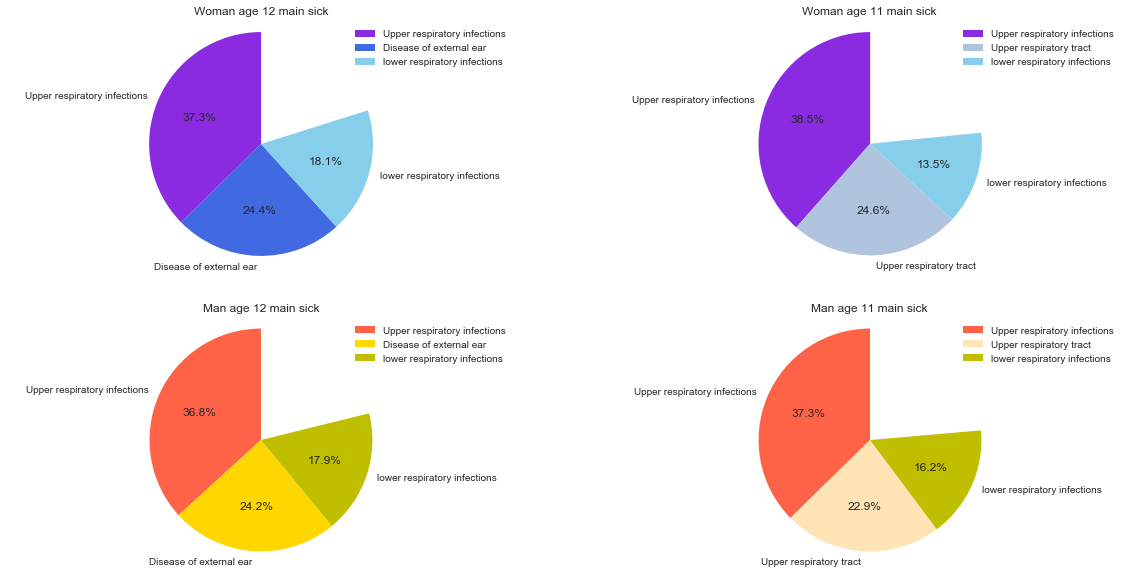

In [48]:
explode=(0,0,0)
colors=['blueviolet','royalblue','skyblue']
colorssss=['blueviolet','lightsteelblue','skyblue']
colorss=['tomato','gold','y']
colorsss=['tomato','moccasin','y']
# plot pie chart
fig=plt.figure(figsize=((20,10)))
ax1=plt.subplot2grid((2,2),(0,0))
plt.pie(main1312['ratio'], labels=main1312.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Woman age 12 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(0,1))
plt.pie(main1311['ratio'], labels=main1311.index, colors=colorssss, autopct='%1.1f%%', startangle=90)
plt.title('Woman age 11 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(1,0))
plt.pie(main1312m['ratio'], labels=main1312m.index, colors=colorss, autopct='%1.1f%%', startangle=90)
plt.title('Man age 12 main sick')
plt.axis('equal')
plt.legend()
ax1=plt.subplot2grid((2,2),(1,1))
plt.pie(main1311m['ratio'], labels=main1311m.index,colors=colorsss, autopct='%1.1f%%', startangle=90)
plt.title('Man age 11 main sick')
plt.axis('equal')
plt.legend()
plt.savefig('이비인후과.png',dpi=1000)

## j0,j2,j3 

In [49]:
j0=JR_2010_2015[JR_2010_2015['main_sick_s']=='J0']
j2=JR_2010_2015[JR_2010_2015['main_sick_s']=='J2']
j3=JR_2010_2015[JR_2010_2015['main_sick_s']=='J3']
j=pd.concat([j0,j2,j3])
j.head()

,age,main_sick_s,sex,treat_kind,시도코드
7,2,J0,2,13,NaN
11,16,J0,2,13,NaN
14,11,J0,2,13,NaN
16,10,J0,2,13,NaN
17,9,J0,2,13,NaN


In [50]:
j_number=j[['age','sex']]
j_c=pd.crosstab(j_number.age, j_number.sex)
j_c=j_c.rename(columns={1:'man',2:'woman'})
j_c.columns.name='sex'
j_c=j_c.reset_index()
j_c

sex,age,man,woman
0,1,321645,296324
1,2,223569,206889
2,3,132553,119348
3,4,106343,104520
4,5,60147,95909
5,6,68410,107645
6,7,95622,157755
7,8,105024,158349
8,9,104808,142546
9,10,89605,123488


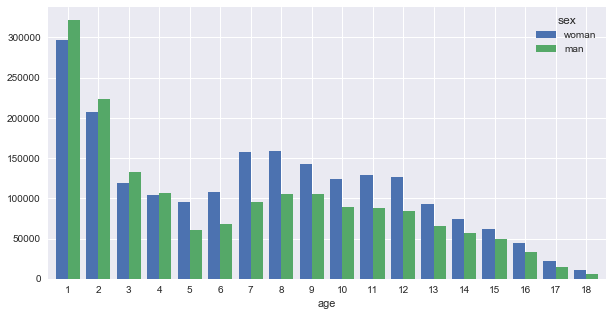

In [51]:
j_c.plot.bar(x='age',y=['woman','man'],rot=0,width=0.8,figsize=((10,5)))

## K2

In [52]:
k=JR_2010_2015[JR_2010_2015['main_sick_s']=='K2']
k.head()

,age,main_sick_s,sex,treat_kind,시도코드
72,11,K2,1,1,NaN
119,13,K2,2,1,NaN
129,14,K2,2,1,NaN
132,11,K2,2,1,NaN
143,10,K2,2,1,NaN


In [53]:
k_number=k[['age','sex']]
k_c=pd.crosstab(k_number.age, k_number.sex)
k_c=k_c.rename(columns={1:'man',2:'woman'})
k_c.columns.name='sex'
k_c=k_c.reset_index()
k_c

sex,age,man,woman
0,1,2610,2297
1,2,4098,4122
2,3,6660,6853
3,4,10108,14445
4,5,8325,17888
5,6,11141,19176
6,7,15454,22973
7,8,16722,23977
8,9,24425,32944
9,10,24015,34074


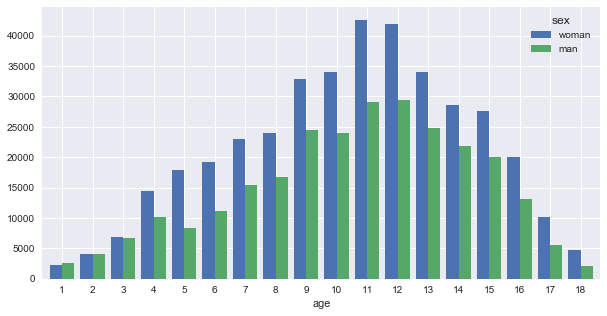

In [54]:
k_c.plot.bar(x='age',y=['woman','man'],rot=0,width=0.8,figsize=((10,5)))

## m5,m1,m7

In [55]:
m1=JR_2010_2015[JR_2010_2015['main_sick_s']=='M1']
m5=JR_2010_2015[JR_2010_2015['main_sick_s']=='M5']
m7=JR_2010_2015[JR_2010_2015['main_sick_s']=='M7']
m=pd.concat([m1,m5,m7])
m.head()

,age,main_sick_s,sex,treat_kind,시도코드
199,16,M1,2,5,NaN
241,14,M1,2,6,NaN
411,12,M1,2,5,NaN
422,15,M1,1,5,NaN
489,13,M1,2,9,NaN


In [56]:
m_number=m[['age','sex']]
m_c=pd.crosstab(m_number.age, m_number.sex)
m_c=m_c.rename(columns={1:'man',2:'woman'})
m_c.columns.name='sex'
m_c=m_c.reset_index()
m_c

sex,age,man,woman
0,1,830,691
1,2,1905,1665
2,3,5450,4254
3,4,11148,9575
4,5,13687,13533
5,6,18625,16988
6,7,28996,24686
7,8,34293,30798
8,9,43300,45993
9,10,48498,67506


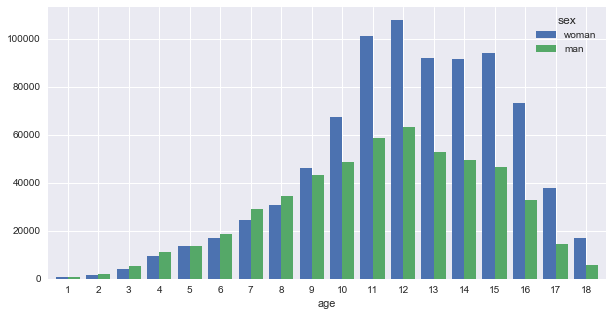

In [57]:
m_c.plot.bar(x='age',y=['woman','man'],rot=0,width=0.8,figsize=((10,5)))

## L2

In [58]:
l=JR_2010_2015[JR_2010_2015['main_sick_s']=='L2']
l.head()

,age,main_sick_s,sex,treat_kind,시도코드
1,11,L2,1,14,NaN
3,4,L2,2,14,NaN
31,6,L2,2,14,NaN
32,2,L2,2,14,NaN
34,6,L2,2,14,NaN


In [59]:
l_number=l[['age','sex']]
l_c=pd.crosstab(l_number.age, l_number.sex)
l_c=l_c.rename(columns={1:'man',2:'woman'})
l_c.columns.name='sex'
l_c=l_c.reset_index()
l_c

sex,age,man,woman
0,1,24341,22162
1,2,14789,14289
2,3,11067,11622
3,4,11015,15161
4,5,11134,19464
5,6,10881,19172
6,7,13133,21172
7,8,12790,19094
8,9,14973,22086
9,10,16173,23915


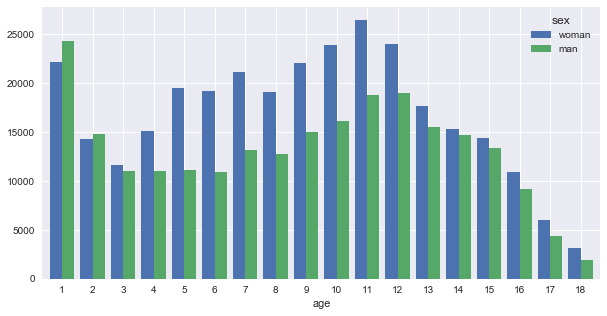

In [60]:
l_c.plot.bar(x='age',y=['woman','man'],rot=0,width=0.8,figsize=((10,5)))

In [61]:
JR_2010_2015.groupby('age').count() #연령대별 총 환자수

,main_sick_s,sex,treat_kind,시도코드
age,,,,
1,1215701,1215701,1215701,400967
2,844230,844230,844230,278673
3,609956,609956,609956,209038
4,617673,617673,617673,208229
5,595766,595766,595766,201282
6,679795,679795,679795,229951
7,931309,931309,931309,315423
8,912704,912704,912704,305578
9,1005895,1005895,1005895,341104


### 감기환자 by 경기도 41

In [62]:
t2015_41=T2015[['가입자 일련번호','성별코드','연령대코드','시도코드','주상병코드']]
t2015_41=t2015_41.drop_duplicates()

In [63]:
t2015_41=t2015_41[t2015_41['시도코드']==41]

In [64]:
t2015_41['주상병코드2']=t2015_41['주상병코드'].str[0:2]

In [65]:
t2015_41mer=t2015_41.loc[:,['성별코드','연령대코드','주상병코드2']]

In [66]:
t2014_41=T2014[['가입자 일련번호','성별코드','연령대코드','시도코드','주상병코드']]
t2014_41=t2014_41.drop_duplicates()

In [67]:
t2014_41=t2014_41[t2014_41['시도코드']==41]

In [68]:
t2014_41['주상병코드2']=t2014_41['주상병코드'].str[0:2]
t2014_41mer=t2014_41.loc[:,['성별코드','연령대코드','주상병코드2']]

In [69]:
t2013_41=T2013[['가입자 일련번호','성별코드','연령대코드','시도코드','주상병코드']]
t2013_41=t2013_41.drop_duplicates()

In [70]:
t2013_41=t2013_41[t2013_41['시도코드']==41]
t2013_41['주상병코드2']=t2013_41['주상병코드'].str[0:2]
t2013_41mer=t2013_41.loc[:,['성별코드','연령대코드','주상병코드2']]

In [71]:
j2010_2015=pd.concat([t2015_41mer,t2014_41mer,t2013_41mer])

In [72]:
j2010_2015j0=j2010_2015[j2010_2015['주상병코드2']=='J0']
j2010_2015j2=j2010_2015[j2010_2015['주상병코드2']=='J2']
j2010_2015j3=j2010_2015[j2010_2015['주상병코드2']=='J3']
j_41=pd.concat([j2010_2015j0,j2010_2015j2,j2010_2015j3])
j_41.shape

(909320, 3)

In [73]:
j_41=j_41.rename(columns={'성별코드':'sex','연령대코드':'age','주상병코드2':'main_sick_s'})

In [74]:
j_41number=j_41[['age','sex']]
j_41c=pd.crosstab(j_41number.age, j_41number.sex)
j_41c=j_41c.rename(columns={1:'man',2:'woman'})
j_41c.columns.name='sex'
j_41c=j_41c.reset_index()
j_41c

sex,age,man,woman
0,1,78999,72860
1,2,58380,52883
2,3,34181,31080
3,4,27818,27674
4,5,14814,23406
5,6,16006,25901
6,7,22893,38813
7,8,27190,42292
8,9,27511,37871
9,10,22215,30993


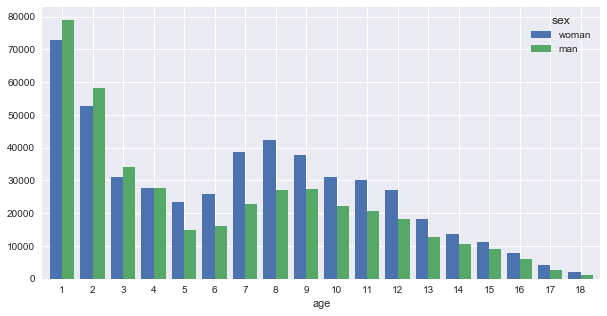

In [75]:
j_41c.plot.bar(x='age',y=['woman','man'],rot=0,width=0.8,figsize=((10,5)))
plt.savefig('경기도의감기환자.png',dpi=1000)

## 경기도의 위염환자

In [76]:
k_41=j2010_2015[j2010_2015['주상병코드2']=='K2']
k_41.shape

(152582, 3)

In [77]:
k_41=k_41.rename(columns={'성별코드':'sex','연령대코드':'age','주상병코드2':'main_sick_s'})

In [78]:
k_41number=k_41[['age','sex']]
k_41c=pd.crosstab(k_41number.age, k_41number.sex)
k_41c=k_41c.rename(columns={1:'man',2:'woman'})
k_41c.columns.name='sex'
k_41c=k_41c.reset_index()
k_41c

sex,age,man,woman
0,1,799,734
1,2,1254,1175
2,3,1880,1932
3,4,2914,4115
4,5,2063,4515
5,6,2659,4613
6,7,3758,5685
7,8,4256,6344
8,9,6063,8728
9,10,5767,8640


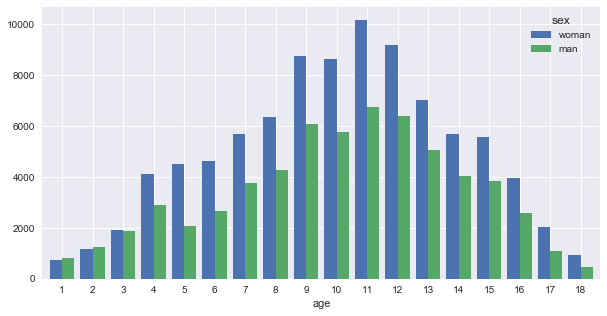

In [79]:
k_41c.plot.bar(x='age',y=['woman','man'],rot=0,width=0.8,figsize=((10,5)))
plt.savefig('경기도의위염환자.png',dpi=1000)

## 경기도의 관절염환자

In [80]:
m1_41=j2010_2015[j2010_2015['주상병코드2']=='M1']
m5_41=j2010_2015[j2010_2015['주상병코드2']=='M5']
m7_41=j2010_2015[j2010_2015['주상병코드2']=='M7']
m_41=pd.concat([m1_41,m5_41,m7_41])
m_41.shape

(263908, 3)

In [81]:
m_41=m_41.rename(columns={'성별코드':'sex','연령대코드':'age','주상병코드2':'main_sick_s'})

In [82]:
m_41number=m_41[['age','sex']]
m_41c=pd.crosstab(m_41number.age, m_41number.sex)
m_41c=m_41c.rename(columns={1:'man',2:'woman'})
m_41c.columns.name='sex'
m_41c=m_41c.reset_index()
m_41c

sex,age,man,woman
0,1,226,191
1,2,540,451
2,3,1424,1130
3,4,2698,2353
4,5,3205,3239
5,6,4175,3930
6,7,6479,5779
7,8,8224,7574
8,9,10227,11263
9,10,10903,15566


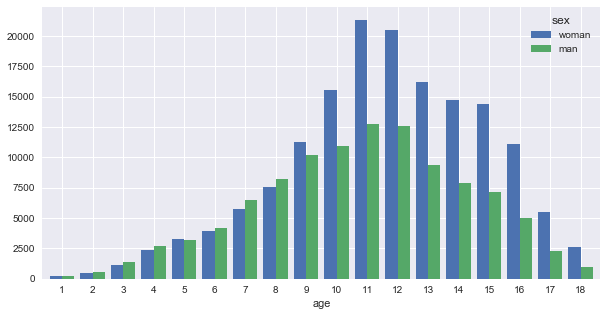

In [83]:
m_41c.plot.bar(x='age',y=['woman','man'], rot=0, width=0.8,figsize=((10,5)))
plt.savefig('경기도의관절염환자.png',dpi=1000)